# Uncertainty Quantification

Frequently we want to quantify the accuracy of our predictions. A Bayesian approach--one where we consider the values of the parameters as random variables is a popular method.

Recall Bayes' theorem for training parameters
\begin{equation}
P(\theta|X_{train}, T_{train}) = \frac{P(T_{train}, \theta|X_{train})}{\int P(T_{train}, \theta|X_{train})\;\mathrm{d}\theta} 
\end{equation}

The integral on the bottom is generally not analytic. And for higher dimensional problems, infeasible to calculate.

So if we want to calculate the bottom integral who do we call?

<img src="http://t3.gstatic.com/images?q=tbn:ANd9GcRJG5IBNzP5r0lNiVbjvc-V4ejuqDRWorvC9cAx8eBYQ4hb5eVY" alt="Drawing" style="width: 300px;"/>

No, not ghost busters, call your Markov Chain Monte Carlo (mcmc) algorithm.



## Metropolis-Hastings

The Metropolis-Hastings algorithm has three steps:

1. __Initialization__ Choose a point $x_0$ to be the first sample as well as an probability density $g(x|y)$ which suggests a candidate for the next sample value $x$. Typically, $g\sim N(y,\sigma)$. 
2. __Iterate__ For each iteration $t$
    1. __Generate__ Generate a candidate $x$ for the next smaple by picking from the distribution $g(x|y)$.
    2. __Calculate__ Calculate the acceptance ratio $\alpha = f(x)/f(x_t)$ where $f(x) \propto P(x)$
    3. __Accept or Reject__ Generate a random number $u \sim U[0,1]$.  Accept if $\alpha < u$

## Developing your Statistical Model


$y = f(x;\theta) + N(0, \epsilon)$

yields

$P(y|x,\theta) = \mathrm{e}^{-SSq/(2\epsilon)}$

SSq is the sum of squares error

$SSq = \sum (y - f(x;\theta))^2$

## Example

Very simple linear regression.
Fit the function $y = mx$ for $\theta = \{m \}$

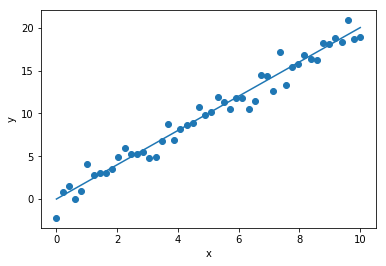

2.004561114658339


In [4]:
import numpy
from matplotlib import pyplot as plt

def MetropolisHastings(x, niter, sigma2, xdata, ydata, function=None):    
    flast = ff(xdata,ydata,x)
    distribution = []
    evals = []
    for i in range(niter):
        xtrial = x + numpy.random.normal(size = x.shape, scale = sigma2)
        u = numpy.random.rand()
        #print(xtrial)
        ftrial = ff(xdata,ydata,xtrial)
        alpha = ftrial/flast
        #print(alpha, u)
        if u < alpha: #accept
            x = xtrial
            flast = ftrial
        distribution.append(x)
        evals.append(flast)
    return distribution, evals
    
def ff(xdata,ydata,theta):
    ypred = theta*xdata
    return numpy.exp(-numpy.sum((ypred-ydata)**2)/xdata.size)

xdata = numpy.linspace(0,10)
ydata = 2*xdata+numpy.random.normal(size = xdata.shape)
niter = 30000
#print(numpy.exp(-ff(xdata,ydata,2)))
xChain, ssChain = MetropolisHastings(numpy.asarray([1e6]), niter, .01, xdata, ydata, function = ff)
#print(xChain)
#print(ssChain)
plt.figure
plt.scatter(xdata,ydata)
plt.plot(xdata, numpy.mean(numpy.asarray(xChain[1000:]))*xdata)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(numpy.mean(numpy.asarray(xChain[1000:])))



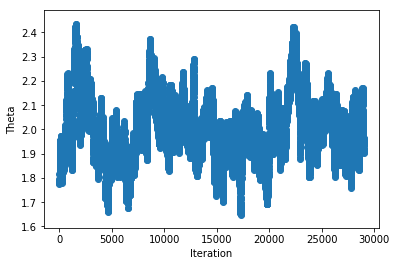

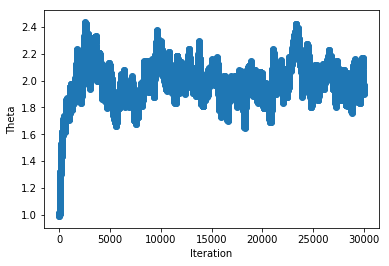

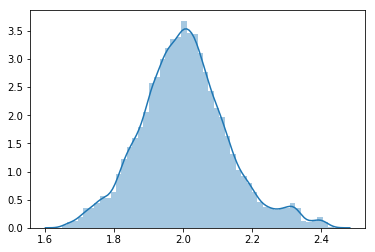

In [8]:
plt.figure()
#range(niter-100000)
plt.scatter(range(niter-1000), xChain[1000:])
plt.xlabel('Iteration')
plt.ylabel('Theta')
plt.show()
plt.figure()
plt.scatter(range(niter), xChain)
plt.xlabel('Iteration')
plt.ylabel('Theta')
plt.show()
import seaborn
seaborn.distplot(xChain[1000:])

### Variations, Advantages and Drawbacks
Choosing the approriate variance for the proposal distribution can be tricky.  Can we infer it?  It turns out we can using the adaptive metropolis algorithm.  The adaptive metropolis algorithm estimates an appropriate sigma based on the chain https://projecteuclid.org/euclid.bj/1080222083

Additionally the burn-in exists, an another variation exists called delayed rejection.  This method will use a second trial candidate if the first is rejected (with a smaller variance in the proposed distribution). https://link.springer.com/article/10.1007/s11222-006-9438-0

As a practical matter, I strongly suggest a deterministic approach to avoid as much of the burn-in as possible.

__Disadvantages__ 
1. Samples are correlated. 
2. The initial samples are not part of the posterior distribution, so a number of them have to be thrown away.  The burn-in rate can sometimes be long.

__Advantages__
1. The "curse of dimensionality" has less of an effect on Markov chains than on other methods for sampling the probability distribution

Recommended Reading: Smith, Ralph C. Uncertainty Quantification: Theory, Implementation, and Applications. Vol. 12. Siam, 2013.


Matlab Code: http://helios.fmi.fi/%7Elainema/mcmc/ https://wiki.helsinki.fi/display/inverse/Adaptive+MCMC

Blackbox code-- Dakota: https://dakota.sandia.gov/

Python code I am developing: 
